서포트 벡터 머신은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델이다. 

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# 5.1 선형 SVM 분류

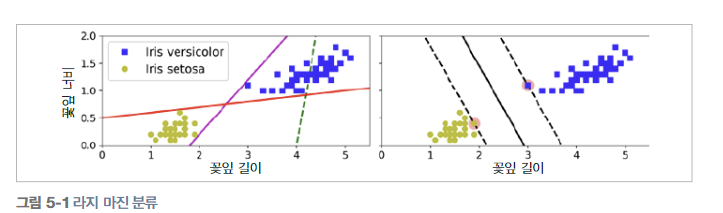

- 왼쪽 그래프에 세 개의 선형 분류기에서 만들어진 결정 경계를 보인다. 점선으로 나타난 결정 경계는 클래스를 적절하게 분류하지 못하고 있다.

- 오른쪽 그래프에 있는 실선은 SVM 분류기의 결정경계이다. 이 직선은 두 개의 클래스를 나누고 있을 뿐 아니라 제일 가까운 훈련 샘플로부터 가능한 멀리 떨어져 있다.

- SVM 의 이러한 성질을 large margin claffication 이라고 한다.

- 도로 경계에 위치한 샘플을 support vector 라고 한다.

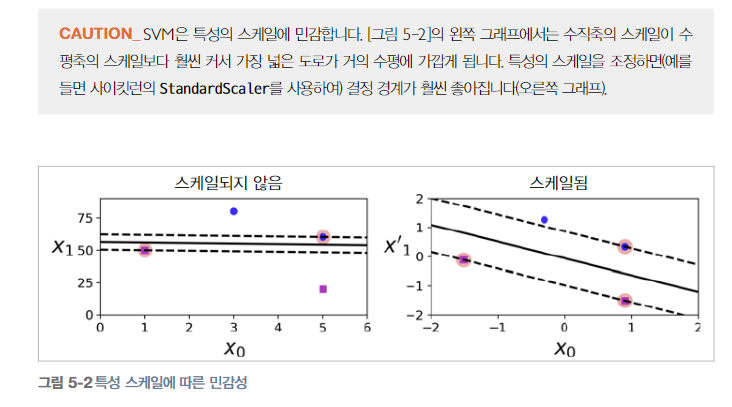

## 5.1.1 소프트 마진 분류

- 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있는 경우를 hard margin classification 이라 한다.

- hard margin classification 의 경우 이상치에 민감하다.

- 이상치 문제에 접근하는 방법은 모델을 좀 더 유연하게 하는 것이다. 도로의 폭을 가능한 넓게 유지하거나 마진 오류(margin violation) 사이에 적절한 균형을 잡아야 한다. 이를 soft margin classification 이라 한다.

In [ ]:
# Iris-Virginia 품종을 감지하기 위해 선형 SVM 모델 훈련.
# C=1, hinge loss function을 적용한 LinearSVM 클래스 사용.
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris["data"][:, (2,3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
  ("scalar", StandardScaler()),
  ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X,y)

Pipeline(steps=[('scalar', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
# 위 모델을 사용해 예측
svm_clf.predict([[5.5, 1.7]])

array([1.])

LinearSVC 클래스를 대신 선형 커널을 사용하는 SVC 클래스로 대체할 수 있다.

  - SVC(kernel="linear", C=1) 으로 설정

또 다른 방법으로 SGDClassifier 모델을 사용하는 것이 있다.

선형 SVM 분류기를 훈련시키기 위해 일반적인 확률 경사 하강법을 적용한다. LinearSVC 만큼 빠르게 수렴하지는 않지만 데이터셋이 아주 커서 메모리에 적재할 수 없거나, 온라인 학습으로 분류 문제를 다룰 때 유용하다.

# 5.2 비선형 SVM 분류

비선형 데이터셋을 다루는 한 가지 방법은 다항 특성과 같은 특성을 더 추가하는 것이다. 

사이킷런을 사용하여 이를 구현하려면 PolynomialFeatures 변환기와 StandardScaler, LinearSVC 를 연결하여 Pipeline을 만든다. 

이를 moons 데이터셋에 적용해 보자. 이 데이터셋은 마주보는 두 개의 반원 모양으로 데이터 포인트가 놓여 있는 이진 분류를 위한 작은 데이터셋이다.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
  ("poly_features", PolynomialFeatures(degree=3)),
  ("scaler", StandardScaler()),
  ("svm_clf", LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
# plt.show()

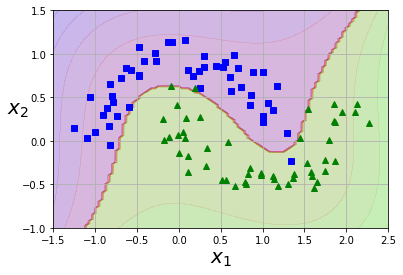

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## 5.2.1 다항식 커널



- SVM을 사용할 땐 kernel trick 이라는 수학적 기교를 적용할 수 있다.

- kernel trick 은 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다. 이 기법은 SVC 파이썬 클래스에 구현되어 있다.

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('svm_clf', SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

매개변수 coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절한다.

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

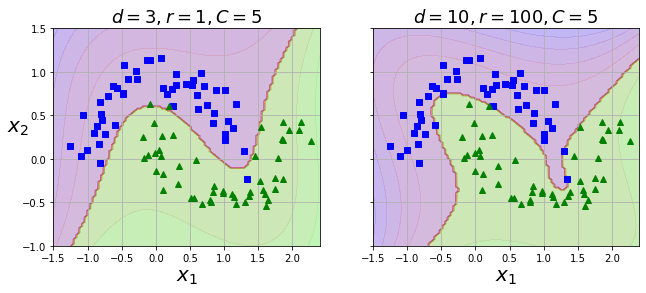

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

## 5.2.2 유사도 특성

비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가하는 것이다. 

예제에서는 가우시안 방사 기저 함수(radial basis function) 을 유사도 함수로 정의하겠다.

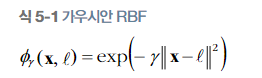

이 함수의 값은 0부터 1 까지 변화하며 종 모양으로 나타난다. 

랜드마크를 설정하는 간단한 방법은 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정하는 것이다. 이렇게 하면 차원이 매우 커지고 따라서 변환된 훈련 세트가 선형적으로 구분될 가능성이 높다. 단점은 훈련 세트에 있는 n 개의 특성을 가진 m개의 샘플이 m개의 특성을 가진 m개의 샘플로 변환된다는 것이다.

훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 만들어진다.

## 5.2.3 가우시안 RBF 커널

In [ ]:
rbf_kernel_svm_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("svm_clf", SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

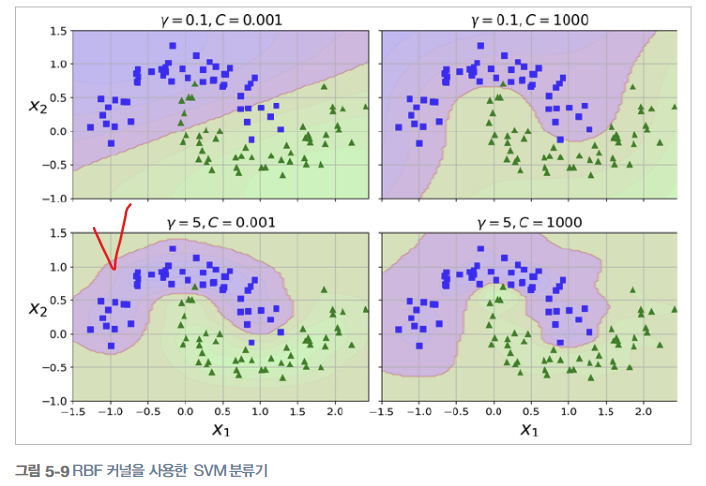

위에서 만든 rbf_kernel_svm_clf 모델은 표시한 산점도에서 나타난다.

- gamma 를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아진다. 

- 결국 하이퍼파라미터 gamma 가 규제의 역할을 한다.

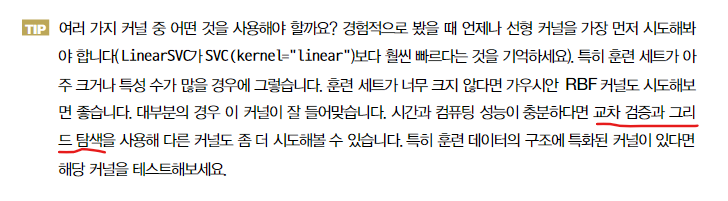

## 5.2.4 계산 복잡도

- LinearSVC 파이썬 클래스는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 한다.이 알고리즘의 훈련 시간 복잡도는 대략 O(m*n) 정도이다.

- SVC는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 한다. 훈련의 시간 복잡도는 보통 O(m^2 * n) 과 O(m^3 * n) 사이이다.

# 5.3 SVM 회귀

SVM을 분류가 아니라 회귀에 적용하는 방법은 목표를 반대로 하는 것이다. 제한된 마진 오류(즉, 도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습한다. 

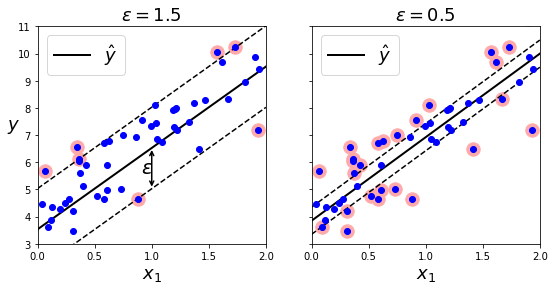

In [ ]:
# 마진오류를 달리 했을 때 그래프
# 난수로 X, y 생성 
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# 2가진 SVM 회귀 모델 
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)    # epslion: 마진 오류
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# 서포트 벡터를 표시하기 위해, 서포트 벡터 찾는 함수.
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

# scatter 생성
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot"), 따로 save 할 필요 없어서 주석처리.
plt.show()

마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없다. 그래서 이 모델을 epsilon-insensitive 라고 한다.

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [ ]:
# 2차 다항 커널을 사용한 SVM 회귀
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

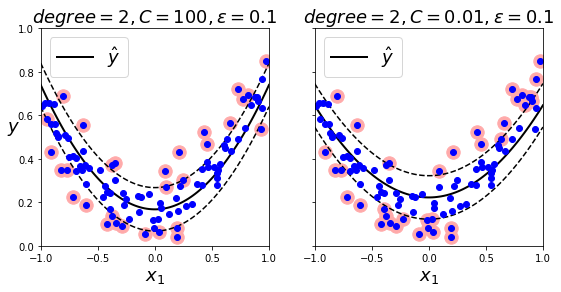

In [ ]:
# 위의 두 2차 다항 커널 SVM 시각화
ig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
# save_fig("svm_with_polynomial_kernel_plot")
plt.show()